## Business Understanding

- What products sell the most and least?
- What payment types are most popular with customers?
- What are the customer demographics?

## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Load order items table

In [ ]:
order_items = pd.read_csv("https://raw.githubusercontent.com/Aisyah-Humaira/Dicoding-Data-Analis/main/E-Commerce%20Public%20Dataset/order_items_dataset.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Load order payment table

In [ ]:
order_payments = pd.read_csv("https://raw.githubusercontent.com/Aisyah-Humaira/Dicoding-Data-Analis/main/E-Commerce%20Public%20Dataset/order_payments_dataset.csv")
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Merge tables from order items and order payment datasets

In [ ]:
all_order_df = pd.merge(
    left=order_items,
    right=order_payments,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_order_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04


Load the product category dataset table

In [ ]:
product_category = pd.read_csv("https://raw.githubusercontent.com/Aisyah-Humaira/Dicoding-Data-Analis/main/E-Commerce%20Public%20Dataset/product_category_name_translation.csv")
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Load product table

In [ ]:
products = pd.read_csv("https://raw.githubusercontent.com/Aisyah-Humaira/Dicoding-Data-Analis/main/E-Commerce%20Public%20Dataset/products_dataset.csv")
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In order to get more detailed information, it is necessary to merge the product category table and the product table.

In [ ]:
merge_product_df = pd.merge(
    left=products,
    right=product_category,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
merge_product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


To get more efficient data, the table is displayed with only the necessary columns.

In [ ]:
kolom = ['product_id', 'product_category_name', 'product_category_name_english']
all_product_df = merge_product_df[kolom]
all_product_df.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


Load the customer table

In [ ]:
customers = pd.read_csv("https://raw.githubusercontent.com/Aisyah-Humaira/Dicoding-Data-Analis/main/E-Commerce%20Public%20Dataset/customers_dataset.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Assessing Data

Check the all_order_df dataset

In [ ]:
all_order_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117604 entries, 0 to 117603
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              117604 non-null  object 
 1   order_item_id         117604 non-null  int64  
 2   product_id            117604 non-null  object 
 3   seller_id             117604 non-null  object 
 4   shipping_limit_date   117604 non-null  object 
 5   price                 117604 non-null  float64
 6   freight_value         117604 non-null  float64
 7   payment_sequential    117601 non-null  float64
 8   payment_type          117601 non-null  object 
 9   payment_installments  117601 non-null  float64
 10  payment_value         117601 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 10.8+ MB


In [ ]:
all_order_df.isna().sum()

order_id                0
order_item_id           0
product_id              0
seller_id               0
shipping_limit_date     0
price                   0
freight_value           0
payment_sequential      3
payment_type            3
payment_installments    3
payment_value           3
dtype: int64

There are 3 missing values in each of the payment_sequential, payment_type, payment_installments, and payment_value columns.

In [ ]:
print("Jumlah duplikasi: ", all_order_df.duplicated().sum())

Jumlah duplikasi:  0


Check all_product_df table

In [ ]:
all_product_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     32951 non-null  object
 1   product_category_name          32341 non-null  object
 2   product_category_name_english  32328 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


In [ ]:
all_product_df.isna().sum()

product_id                         0
product_category_name            610
product_category_name_english    623
dtype: int64

There are missing values in the product_category_name and product_category_name_english tables

In [ ]:
print("Jumlah duplikasi: ", all_product_df.duplicated().sum())

Jumlah duplikasi:  0


Check the customers table

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

### Cleaning Data

Check the Nan data contained in the all_order_df table

In [ ]:
all_order_df[all_order_df.payment_sequential.isna()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
88091,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,NaN,NaN,NaN,NaN
88092,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,NaN,NaN,NaN,NaN
88093,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,NaN,NaN,NaN,NaN


Because there are only 3 missing values, the data can be dropped.

In [ ]:
all_order_df.dropna(inplace = True)

In [ ]:
all_order_df.isna().sum()

order_id                0
order_item_id           0
product_id              0
seller_id               0
shipping_limit_date     0
price                   0
freight_value           0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Clean up all_product_df

In [ ]:
all_product_df[all_product_df.product_category_name_english.isna()]

,product_id,product_category_name,product_category_name_english
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN
154,46b48281eb6d663ced748f324108c733,NaN,NaN
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN
...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN


Cleaning the first data in the product_category_name_english column by using the imputation method to handle missing values.

In [ ]:
all_product_df.product_category_name_english.value_counts()

bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
tablets_printing_image          9
fashion_childrens_clothes       5
home_comfort_2                  5
security_and_services           2
cds_dvds_musicals               1
Name: product_category_name_english, Length: 71, dtype: int64

In [ ]:
all_product_df.product_category_name_english.fillna(value="bed_bath_table", inplace=True)

<ipython-input-24-61cc0e84ac8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_product_df.product_category_name_english.fillna(value="bed_bath_table", inplace=True)


Cleaning the first data in the product_category_name column using the same method

In [ ]:
all_product_df.product_category_name.value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [ ]:
all_product_df.product_category_name.fillna(value="cama_mesa_banho", inplace=True)

<ipython-input-26-c283974d9c06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_product_df.product_category_name.fillna(value="cama_mesa_banho", inplace=True)


Check the process is running properly

In [ ]:
all_product_df.isna().sum()

product_id                       0
product_category_name            0
product_category_name_english    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore data all_product_df

View summary statistical parameters of all_product_df data

In [ ]:
all_product_df.describe(include="all")

,product_id,product_category_name,product_category_name_english
count,32951,32951,32951
unique,32951,73,71
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,bed_bath_table
freq,1,3639,3652


Search for product-related information based on the product name.

In [ ]:
sum_order_items_df = all_product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).reset_index()
sum_order_items_df.rename(columns={
    "product_category_name_english": "product name",
    "product_id": "quantity"}, inplace=True)
sum_order_items_df.head(15)

,product name,quantity
0,bed_bath_table,3652
1,sports_leisure,2867
2,furniture_decor,2657
3,health_beauty,2444
4,housewares,2335
5,auto,1900
6,computers_accessories,1639
7,toys,1411
8,watches_gifts,1329
9,telephony,1134


### Explore data all_order_df

View a summary of the statistical parameters of the all_order_df data

In [ ]:
all_order_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
count,117601,117601.000000,117601,117601,117601,117601.000000,117601.000000,117601.000000,117601,117601.000000,117601.000000
unique,98665,NaN,32951,3095,93317,NaN,NaN,NaN,4,NaN,NaN
top,895ab968e7bb0d5659d16cd74cd1650c,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,NaN,NaN,NaN,credit_card,NaN,NaN
freq,63,NaN,536,2133,63,NaN,NaN,NaN,86769,NaN,NaN
mean,NaN,1.195900,NaN,NaN,NaN,120.824783,20.045990,1.093528,NaN,2.939482,172.686752
std,NaN,0.697706,NaN,NaN,NaN,184.479323,15.861315,0.726692,NaN,2.774223,267.592290
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,1.000000,NaN,1.000000,60.870000
50%,NaN,1.000000,NaN,NaN,NaN,74.900000,16.290000,1.000000,NaN,2.000000,108.210000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.190000,1.000000,NaN,4.000000,189.260000


Search for product-related information based on the type of payment used.

In [ ]:
payment_type = all_order_df.groupby(by="payment_type").product_id.nunique().sort_values(ascending=False).reset_index()
payment_type.head()

,payment_type,product_id
0,credit_card,28428
1,boleto,10540
2,voucher,3143
3,debit_card,1366


### Explore customers data

View a summary of the statistical parameters of the customers' data

In [ ]:
customers.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Check the number of orders by city

In [ ]:
bycity_df  = customers.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).reset_index()
bycity_df.rename(columns={
    "customer_id": "customer_count"
    }, inplace=True)
bycity_df.head()

,customer_city,customer_count
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521


## Visualization & Explanatory Analysis

###  Question 1: What are the most and least sold products?

<ipython-input-36-53417704adc5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity", y="product name", data=sum_order_items_df.head(5), palette=colors_best, ax=ax[0])
<ipython-input-36-53417704adc5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity", y="product name", data=sum_order_items_df.sort_values(by="quantity", ascending=True).head(5), palette=colors_worst, ax=ax[1])


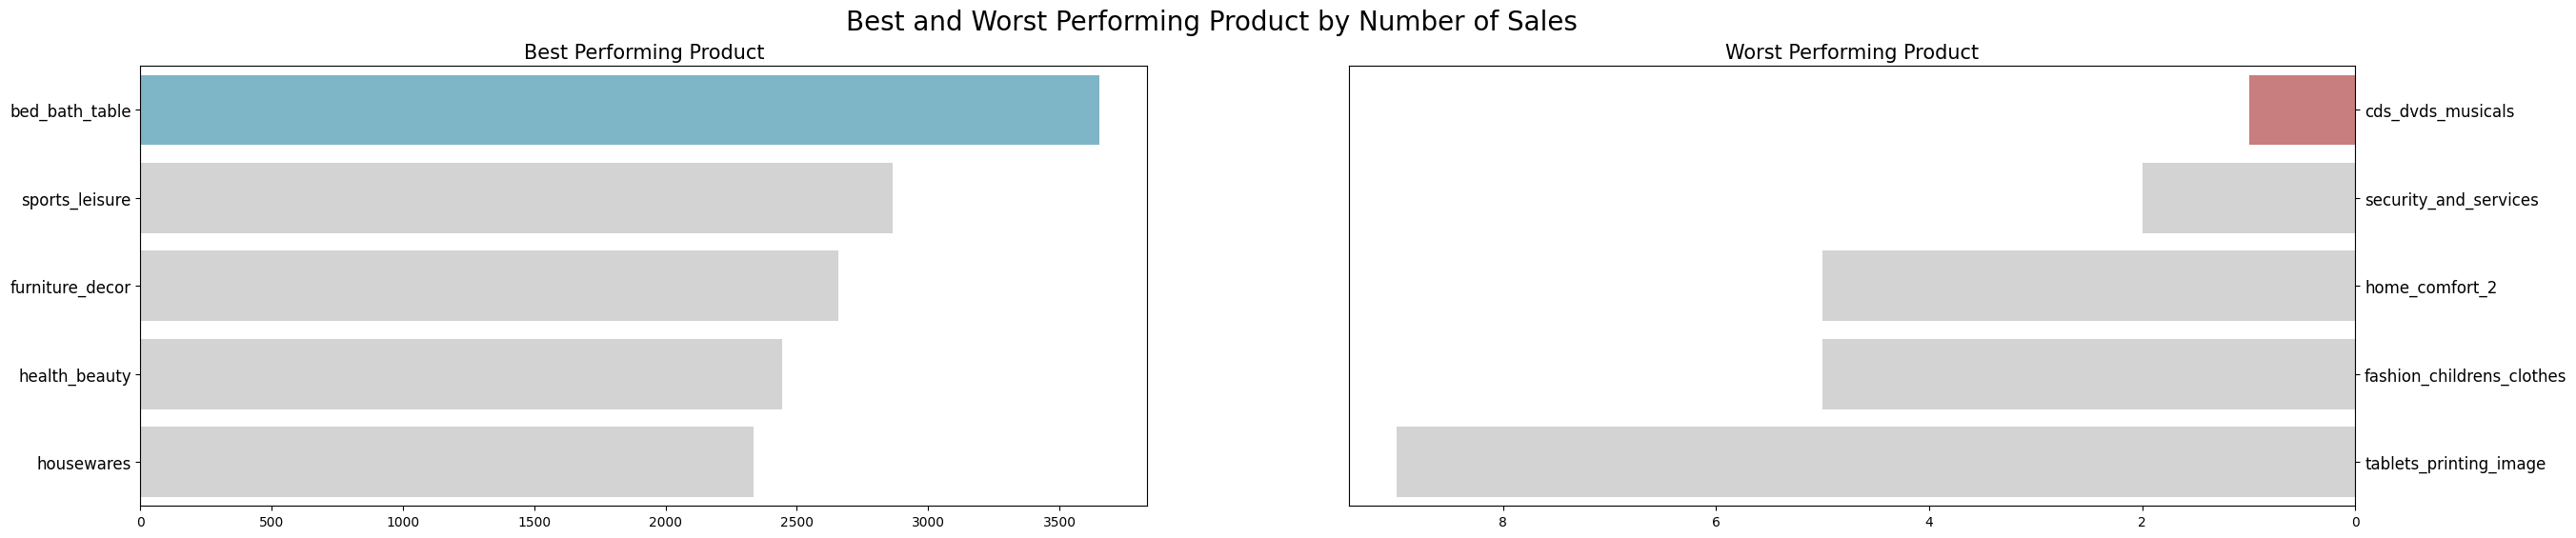

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))

#Best product
colors_best = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x="quantity", y="product name", data=sum_order_items_df.head(5), palette=colors_best, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

#worst product
colors_worst = ["#D47272", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x="quantity", y="product name", data=sum_order_items_df.sort_values(by="quantity", ascending=True).head(5), palette=colors_worst, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

### Question 2: What type of payment is most popular with customers?

<ipython-input-37-878f51f3c3cf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


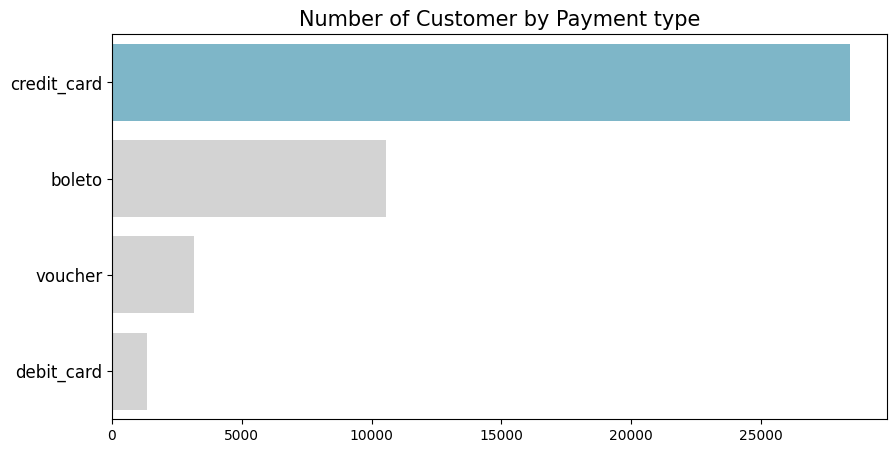

In [ ]:
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x = "product_id",
    y = "payment_type",
    data = payment_type.head(),
    palette = colors
)

plt.title("Number of Customer by Payment type", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Question 3: What are the customer demographics?

<ipython-input-38-17e7bb07b5b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


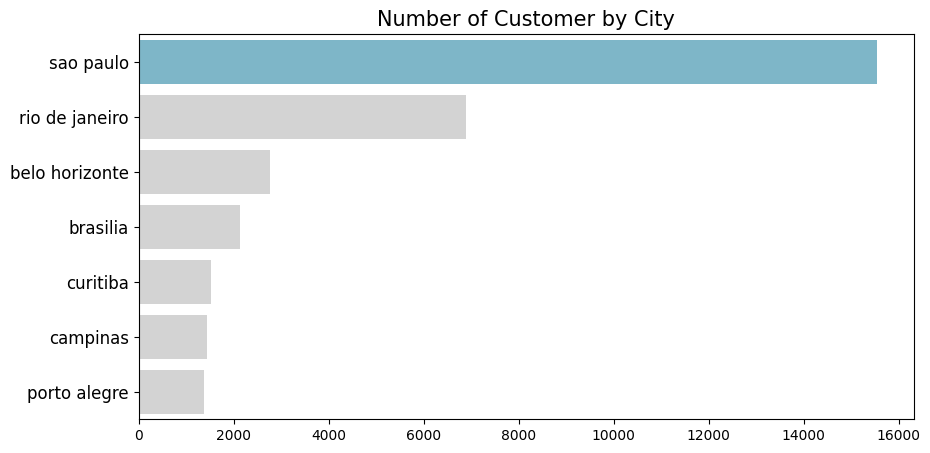

In [ ]:
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x = "customer_count",
    y = "customer_city",
    data = bycity_df.head(7),
    palette = colors
)

plt.title("Number of Customer by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

- Conclution question 1: Based on the data visualisation that has been presented, it can be seen that the most sold product is **Bed bath table** while the least purchased product is **cds dvds musicals**

- Conclution question 2: From the visualisation above, it can be seen that customers are most fond of making payments using **credit card**

- Conclution question 3: Based on the visualisation of the data presented, it can be seen that the most customers come from the city of **Sao Paulo**